# Diseño de Software

## 1. Definición de Arquitectura de Software
* Introducción a la Arquitectura de Software
* Componentes de una Arquitectura de Software
* Patrones arquitectónicos comunes (MVC, Microservicios, etc.)

## 2. Diferencias entre Arquitectura de Software y Diseño de Software
* Nivel de abstracción: Arquitectura vs. Diseño
* Impacto en la toma de decisiones técnicas
* Ejemplos comparativos (Caso práctico)

## 3. La Arquitectura de Software como enlace del entorno del negocio con el entorno de la solución
* Rol de la Arquitectura de Software en los objetivos del negocio
* Cómo la arquitectura conecta las necesidades del negocio con la tecnología
* Stakeholders y su impacto en la arquitectura

## 4. Lineamientos y atributos de la calidad del software
* Atributos de calidad (mantenibilidad, escalabilidad, seguridad, etc.)
* Técnicas para evaluar la calidad del software (QA, métricas de calidad)
* Importancia de los lineamientos en el ciclo de vida del software

## 5. La evolución del diseño del software
* Breve historia del diseño de software
* MVC, SOLID, CAPAS, CQRS
* Transición de paradigmas: Desde el diseño monolítico a microservicios

## 6. Diseño a partir del Diagrama de Clase
* Definición y componentes de un Diagrama de Clases (clases, relaciones, etc.)
* Diseño orientado a objetos (principios y patrones)
* Ejemplo práctico: Construcción de un diagrama de clases y su implementación en código

# Arquitectura MVC (Modelo-Vista-Controlador)

El patrón **Modelo-Vista-Controlador (MVC)** es una arquitectura que organiza una aplicación en tres componentes principales: Modelo, Vista y Controlador. Es ampliamente utilizado en el desarrollo de aplicaciones web y de software debido a su capacidad para separar las responsabilidades, lo que facilita el mantenimiento y escalabilidad del sistema.

### Componentes de MVC

1. **Modelo:**
    - Es responsable de la lógica de la aplicación y la gestión de los datos.
    - Interactúa directamente con la base de datos u otras fuentes de datos.
    - Define cómo se manipulan y estructuran los datos.

2. **Vista:**
    - Representa la interfaz de usuario.
    - Presenta los datos proporcionados por el modelo de una forma comprensible para el usuario.
    - Es responsable de la visualización y no debe contener lógica de negocio.

3. **Controlador:**
    - Actúa como intermediario entre el modelo y la vista.
    - Recibe las entradas del usuario (eventos, interacciones), las procesa y actualiza el modelo o la vista según sea necesario.
    - Encapsula la lógica de control del flujo de la aplicación.

### Beneficios de MVC
- **Separación de responsabilidades:** Cada componente tiene un rol bien definido.
- **Facilidad de mantenimiento:** Cambios en la lógica de negocio (Modelo) no afectan la presentación (Vista).
- **Escalabilidad:** Facilita el crecimiento de la aplicación sin comprometer su organización.

### Ejemplos de uso
- Frameworks web como Django (Python), Ruby on Rails (Ruby), y ASP.NET MVC (C#) se basan en este patrón.

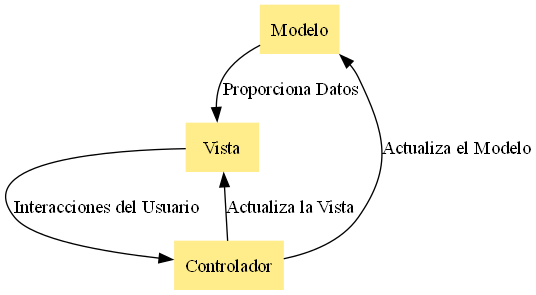

In [6]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar MVC
dot = Digraph('MVC', node_attr={'shape': 'box', 'style': 'filled', 'color': 'lightgoldenrod1'})

# Nodos del modelo MVC
dot.node('Modelo', 'Modelo')
dot.node('Vista', 'Vista')
dot.node('Controlador', 'Controlador')

# Conexiones entre los componentes MVC
dot.edge('Controlador', 'Modelo', label='Actualiza el Modelo')
dot.edge('Modelo', 'Vista', label='Proporciona Datos')
dot.edge('Vista', 'Controlador', label='Interacciones del Usuario')
dot.edge('Controlador', 'Vista', label='Actualiza la Vista')

# Guardar y renderizar el gráfico en formato PNG
dot.render('mvc', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='mvc.png')

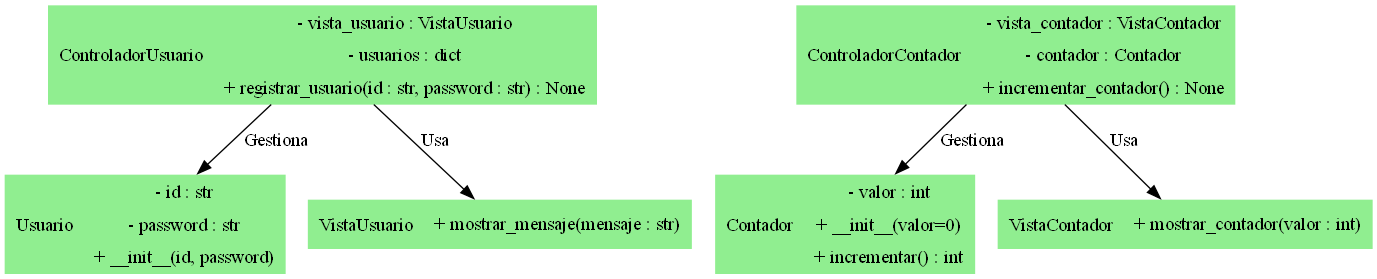

In [22]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar el diagrama de clase UML
dot = Digraph('UML_MVC', node_attr={'shape': 'record', 'style': 'filled', 'color': 'lightgreen'})

# Definir las clases y sus atributos/métodos
dot.node('Usuario', 'Usuario | { - id : str | - password : str | + __init__(id, password) }')

dot.node('Contador', 'Contador | { - valor : int | + __init__(valor=0) | + incrementar() : int }')

dot.node('VistaUsuario', 'VistaUsuario | { + mostrar_mensaje(mensaje : str) }')

dot.node('VistaContador', 'VistaContador | { + mostrar_contador(valor : int) }')

dot.node('ControladorUsuario', 'ControladorUsuario | { - vista_usuario : VistaUsuario | - usuarios : dict | + registrar_usuario(id : str, password : str) : None }')

dot.node('ControladorContador', 'ControladorContador | { - vista_contador : VistaContador | - contador : Contador | + incrementar_contador() : None }')

# Definir las relaciones entre las clases
dot.edge('ControladorUsuario', 'VistaUsuario', label='Usa')
dot.edge('ControladorUsuario', 'Usuario', label='Gestiona')
dot.edge('ControladorContador', 'VistaContador', label='Usa')
dot.edge('ControladorContador', 'Contador', label='Gestiona')

# Guardar y renderizar el gráfico en formato PNG
dot.render('mvc_diagrama_clase', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='mvc_diagrama_clase.png')


# Arquitectura en Capas

La **Arquitectura en Capas** es uno de los patrones arquitectónicos más utilizados en el diseño de software. Este patrón organiza una aplicación en capas separadas, donde cada una tiene responsabilidades específicas y se comunica con las capas adyacentes.

### Componentes de la Arquitectura en Capas

1. **Capa de Presentación (UI o Interfaz de Usuario):**
    - Es la interfaz con la que interactúan los usuarios.
    - Incluye componentes como formularios, páginas web, y cualquier elemento visual.
    - No contiene lógica de negocio, solo maneja la presentación y captura de datos.

2. **Capa de Lógica de Negocio (Business Logic):**
    - Contiene las reglas y lógica del negocio.
    - Procesa datos, aplica reglas, y realiza cálculos necesarios para cumplir con los requisitos del sistema.
    - Actúa como el núcleo funcional de la aplicación.

3. **Capa de Acceso a Datos (Data Access):**
    - Gestiona la comunicación con la base de datos u otras fuentes de almacenamiento.
    - Realiza operaciones CRUD (Crear, Leer, Actualizar, Eliminar) sobre los datos.

4. **Capa de Almacenamiento (Database o Storage):**
    - Es donde se almacenan los datos de la aplicación, ya sea en bases de datos relacionales, no relacionales, o sistemas de archivos.

### Beneficios de la Arquitectura en Capas
- **Separación de responsabilidades:** Cada capa tiene una función específica.
- **Mantenibilidad:** Cambios en una capa (por ejemplo, en la lógica de negocio) no afectan a otras capas.
- **Reusabilidad:** Componentes de una capa pueden ser reutilizados en diferentes proyectos.

### Ejemplos de uso
- Aplicaciones web tradicionales que siguen un modelo clásico de presentación, lógica y datos.
- Sistemas empresariales grandes donde es necesario un control estructurado de cada parte del sistema.



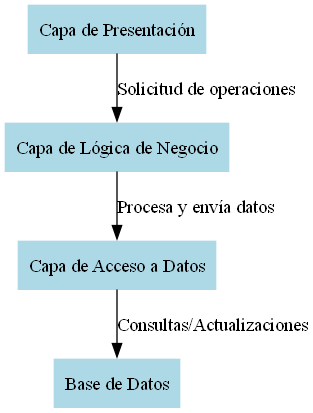

In [10]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar la arquitectura en capas
dot = Digraph('Arquitectura en Capas', node_attr={'shape': 'box', 'style': 'filled', 'color': 'lightblue'})

# Nodos representando las capas
dot.node('UI', 'Capa de Presentación')
dot.node('BL', 'Capa de Lógica de Negocio')
dot.node('DA', 'Capa de Acceso a Datos')
dot.node('DB', 'Base de Datos')

# Conexiones entre las capas
dot.edge('UI', 'BL', label='Solicitud de operaciones')
dot.edge('BL', 'DA', label='Procesa y envía datos')
dot.edge('DA', 'DB', label='Consultas/Actualizaciones')

# Guardar y renderizar el gráfico en formato PNG
dot.render('arquitectura_en_capas', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='arquitectura_en_capas.png')

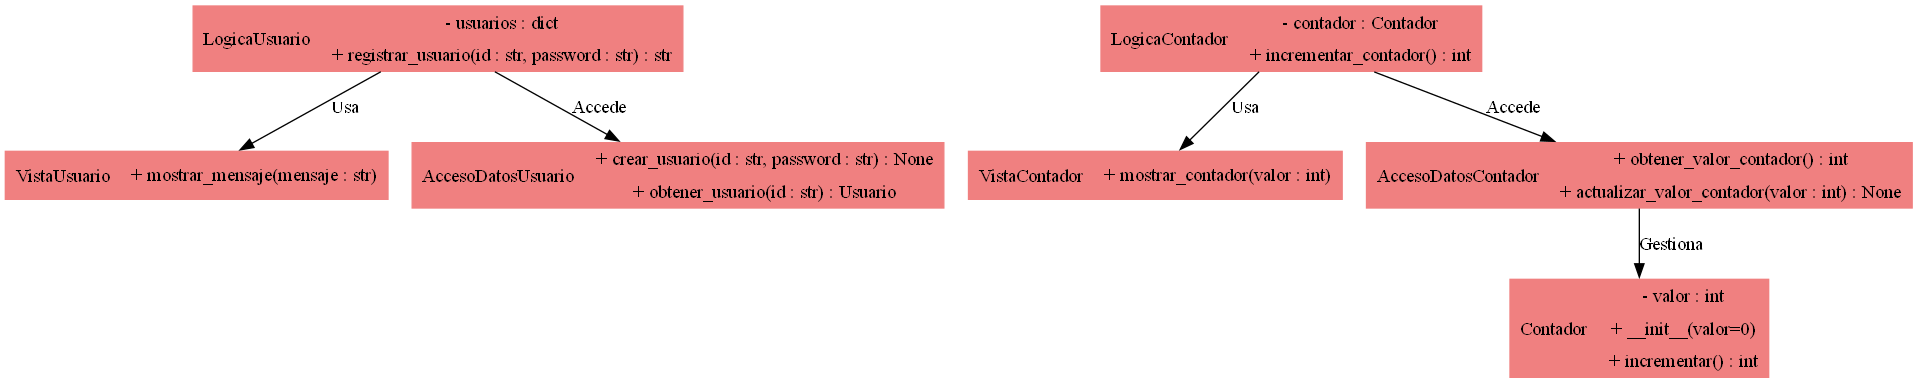

In [24]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar el diagrama de clase UML
dot = Digraph('UML_CapLayers', node_attr={'shape': 'record', 'style': 'filled', 'color': 'lightcoral'})

# Definir las clases y sus atributos/métodos para cada capa
dot.node('VistaUsuario', 'VistaUsuario | { + mostrar_mensaje(mensaje : str) }')

dot.node('VistaContador', 'VistaContador | { + mostrar_contador(valor : int) }')

dot.node('LogicaUsuario', 'LogicaUsuario | { - usuarios : dict | + registrar_usuario(id : str, password : str) : str }')

dot.node('LogicaContador', 'LogicaContador | { - contador : Contador | + incrementar_contador() : int }')

dot.node('Contador', 'Contador | { - valor : int | + __init__(valor=0) | + incrementar() : int }')

dot.node('AccesoDatosUsuario', 'AccesoDatosUsuario | { + crear_usuario(id : str, password : str) : None | + obtener_usuario(id : str) : Usuario }')

dot.node('AccesoDatosContador', 'AccesoDatosContador | { + obtener_valor_contador() : int | + actualizar_valor_contador(valor : int) : None }')

# Definir las relaciones entre las clases y capas
dot.edge('LogicaUsuario', 'VistaUsuario', label='Usa')
dot.edge('LogicaContador', 'VistaContador', label='Usa')
dot.edge('LogicaUsuario', 'AccesoDatosUsuario', label='Accede')
dot.edge('LogicaContador', 'AccesoDatosContador', label='Accede')
dot.edge('AccesoDatosContador', 'Contador', label='Gestiona')

# Guardar y renderizar el gráfico en formato PNG
dot.render('capas_diagrama_clase', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='capas_diagrama_clase.png')

# Principios SOLID

Los principios **SOLID** son un conjunto de buenas prácticas que ayudan a los desarrolladores a crear sistemas más robustos y fáciles de mantener. Fueron popularizados por Robert C. Martin y se aplican principalmente en la programación orientada a objetos.

### Desglose de los Principios SOLID

1. **S - Principio de Responsabilidad Única (Single Responsibility Principle - SRP):**
    - **Definición:** Cada clase o módulo debe tener una única razón para cambiar. Es decir, una clase debe tener una única responsabilidad.
    - **Ejemplo:** Si tienes una clase `Usuario`, no debería encargarse de enviar correos electrónicos; eso debería estar en una clase separada, como `ServicioEmail`.

2. **O - Principio de Abierto/Cerrado (Open/Closed Principle - OCP):**
    - **Definición:** Las entidades de software (clases, módulos, funciones) deben estar abiertas para su extensión, pero cerradas para su modificación.
    - **Ejemplo:** Si necesitas cambiar el comportamiento de una clase, deberías hacerlo mediante la extensión (herencia o composición), sin modificar su código original.

3. **L - Principio de Sustitución de Liskov (Liskov Substitution Principle - LSP):**
    - **Definición:** Los objetos de una clase derivada deben poder sustituir a objetos de la clase base sin alterar el funcionamiento correcto del programa.
    - **Ejemplo:** Si una clase `Animal` tiene un método `moverse()`, todas sus subclases (por ejemplo, `Perro`, `Pez`) deberían poder implementar ese método sin romper la lógica.

4. **I - Principio de Segregación de Interfaces (Interface Segregation Principle - ISP):**
    - **Definición:** Es preferible tener muchas interfaces específicas y pequeñas en lugar de una única interfaz general y grande. Las clases no deberían verse obligadas a implementar métodos que no necesitan.
    - **Ejemplo:** Si tienes una interfaz `Empleado`, en lugar de incluir métodos que todos los empleados deben implementar, podrías tener interfaces más específicas como `IPuedeProgramar`, `IPuedeAdministrar`, etc.

5. **D - Principio de Inversión de Dependencias (Dependency Inversion Principle - DIP):**
    - **Definición:** Los módulos de alto nivel no deben depender de módulos de bajo nivel. Ambos deben depender de abstracciones (interfaces o clases abstractas). Además, las abstracciones no deben depender de los detalles; los detalles deben depender de las abstracciones.
    - **Ejemplo:** En lugar de que una clase `Controlador` dependa directamente de una clase `RepositorioConcreto`, debería depender de una interfaz `IRepositorio`, permitiendo cambiar la implementación del repositorio sin modificar el controlador.

### Beneficios de Aplicar SOLID
- **Mantenibilidad:** Facilita realizar cambios en el código sin afectar otras partes del sistema.
- **Reusabilidad:** Los componentes son más independientes y se pueden reutilizar en otros proyectos.
- **Escalabilidad:** El sistema puede crecer de manera organizada.

### Ejemplos de Aplicación
- Diseño de aplicaciones empresariales grandes donde se busca minimizar el acoplamiento entre componentes.
- Proyectos donde la extensión y el cambio son comunes, como en frameworks o bibliotecas de código.

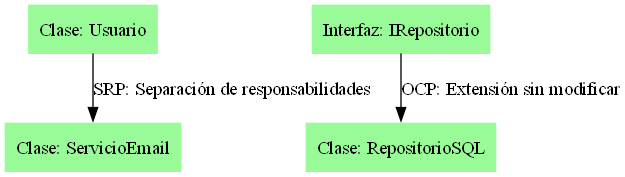

In [13]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar los principios SOLID
dot = Digraph('SOLID', node_attr={'shape': 'box', 'style': 'filled', 'color': 'palegreen'})

# Nodos representando clases y principios
dot.node('Usuario', 'Clase: Usuario')
dot.node('ServicioEmail', 'Clase: ServicioEmail')
dot.node('IRepositorio', 'Interfaz: IRepositorio')
dot.node('RepositorioSQL', 'Clase: RepositorioSQL')

# Conexiones representando la aplicación de SRP y OCP
dot.edge('Usuario', 'ServicioEmail', label='SRP: Separación de responsabilidades')
dot.edge('IRepositorio', 'RepositorioSQL', label='OCP: Extensión sin modificar')

# Guardar y renderizar el gráfico en formato PNG
dot.render('solid_principios', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='solid_principios.png')

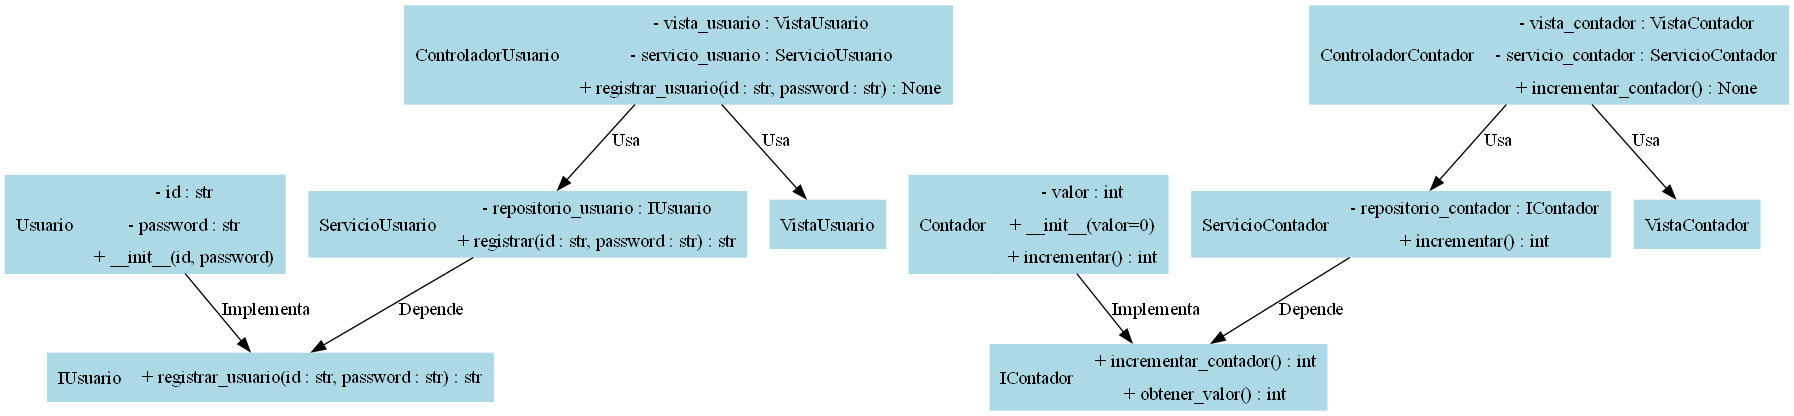

In [26]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar el diagrama de clase UML
dot = Digraph('UML_SOLID', node_attr={'shape': 'record', 'style': 'filled', 'color': 'lightblue'})

# Definir las clases y sus atributos/métodos
dot.node('IUsuario', 'IUsuario | { + registrar_usuario(id : str, password : str) : str }')
dot.node('IContador', 'IContador | { + incrementar_contador() : int | + obtener_valor() : int }')

dot.node('Usuario', 'Usuario | { - id : str | - password : str | + __init__(id, password) }')
dot.node('Contador', 'Contador | { - valor : int | + __init__(valor=0) | + incrementar() : int }')

dot.node('ServicioUsuario', 'ServicioUsuario | { - repositorio_usuario : IUsuario | + registrar(id : str, password : str) : str }')
dot.node('ServicioContador', 'ServicioContador | { - repositorio_contador : IContador | + incrementar() : int }')

dot.node('ControladorUsuario', 'ControladorUsuario | { - vista_usuario : VistaUsuario | - servicio_usuario : ServicioUsuario | + registrar_usuario(id : str, password : str) : None }')
dot.node('ControladorContador', 'ControladorContador | { - vista_contador : VistaContador | - servicio_contador : ServicioContador | + incrementar_contador() : None }')

# Definir las relaciones entre las clases
dot.edge('ControladorUsuario', 'VistaUsuario', label='Usa')
dot.edge('ControladorContador', 'VistaContador', label='Usa')
dot.edge('ControladorUsuario', 'ServicioUsuario', label='Usa')
dot.edge('ControladorContador', 'ServicioContador', label='Usa')
dot.edge('ServicioUsuario', 'IUsuario', label='Depende')
dot.edge('ServicioContador', 'IContador', label='Depende')
dot.edge('Usuario', 'IUsuario', label='Implementa')
dot.edge('Contador', 'IContador', label='Implementa')

# Guardar y renderizar el gráfico en formato PNG
dot.render('solid_diagrama_clase', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='solid_diagrama_clase.png')

# CQRS (Command Query Responsibility Segregation)

**CQRS (Command Query Responsibility Segregation)** es un patrón arquitectónico que separa las operaciones de lectura y escritura en sistemas de software. Este enfoque ayuda a optimizar el rendimiento, la escalabilidad y la seguridad al distinguir claramente entre operaciones que modifican el estado (comandos) y aquellas que solo leen el estado (consultas).

### Conceptos Clave de CQRS

1. **Comandos (Commands):**
    - **Definición:** Son operaciones que modifican el estado del sistema. Por ejemplo, crear un nuevo usuario o actualizar una orden.
    - **Características:** Los comandos suelen tener efectos secundarios y deben ser manejados por una lógica de negocio específica.
    - **Ejemplo:** `CrearUsuario`, `ActualizarOrden`.

2. **Consultas (Queries):**
    - **Definición:** Son operaciones que leen el estado del sistema sin modificarlo. Se enfocan en obtener datos y presentarlos.
    - **Características:** Las consultas no deben modificar el estado del sistema y pueden ser optimizadas para la lectura.
    - **Ejemplo:** `ObtenerUsuarioPorId`, `ListarOrdenes`.

3. **Separación de Modelos:**
    - **Modelos de Comando:** Modelos diseñados para manejar la lógica de negocio y las actualizaciones del estado.
    - **Modelos de Consulta:** Modelos diseñados para proporcionar datos de manera eficiente y suelen estar optimizados para consultas específicas.

### Beneficios de CQRS
- **Escalabilidad:** Permite escalar las operaciones de lectura y escritura de manera independiente.
- **Rendimiento:** Las consultas pueden ser optimizadas para rendimiento sin afectar la lógica de escritura.
- **Seguridad:** Se puede aplicar control de acceso diferenciado entre operaciones de lectura y escritura.
- **Flexibilidad:** Facilita la implementación de auditoría y mecanismos de reversión de cambios.

### Ejemplos de Aplicación
- Sistemas con alta carga de lectura y escritura, como aplicaciones de comercio electrónico o redes sociales.
- Aplicaciones que requieren una separación clara entre lógica de negocio y lógica de presentación.

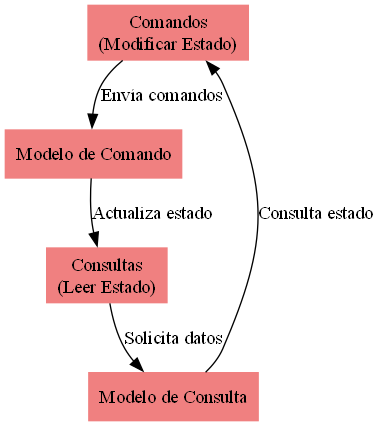

In [16]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar CQRS
dot = Digraph('CQRS', node_attr={'shape': 'box', 'style': 'filled', 'color': 'lightcoral'})

# Nodos representando los componentes de CQRS
dot.node('Command', 'Comandos\n(Modificar Estado)')
dot.node('Query', 'Consultas\n(Leer Estado)')
dot.node('ModeloComando', 'Modelo de Comando')
dot.node('ModeloConsulta', 'Modelo de Consulta')

# Conexiones entre los componentes
dot.edge('Command', 'ModeloComando', label='Envía comandos')
dot.edge('ModeloComando', 'Query', label='Actualiza estado')
dot.edge('Query', 'ModeloConsulta', label='Solicita datos')
dot.edge('ModeloConsulta', 'Command', label='Consulta estado')

# Guardar y renderizar el gráfico en formato PNG
dot.render('cqrs', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='cqrs.png')

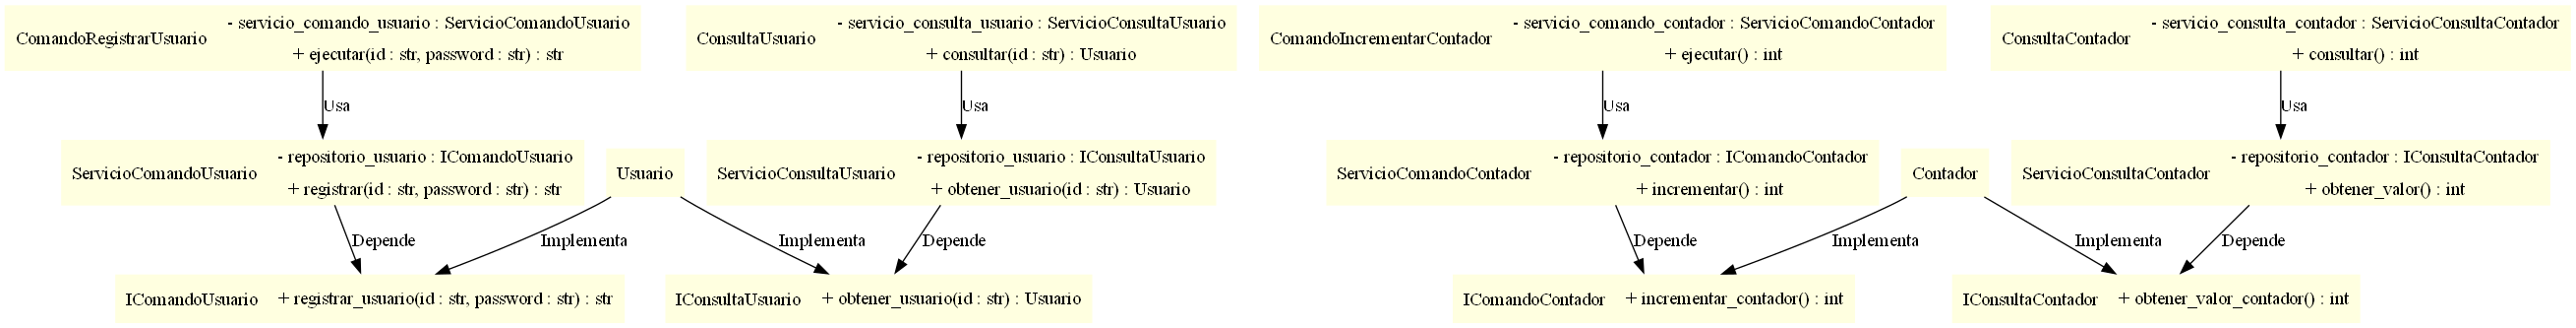

In [28]:
from graphviz import Digraph
from IPython.display import Image

# Crear un objeto Digraph para representar el diagrama de clase UML
dot = Digraph('UML_CQRS_SOLID', node_attr={'shape': 'record', 'style': 'filled', 'color': 'lightyellow'})

# Definir las clases y sus atributos/métodos
dot.node('IComandoUsuario', 'IComandoUsuario | { + registrar_usuario(id : str, password : str) : str }')
dot.node('IComandoContador', 'IComandoContador | { + incrementar_contador() : int }')

dot.node('IConsultaUsuario', 'IConsultaUsuario | { + obtener_usuario(id : str) : Usuario }')
dot.node('IConsultaContador', 'IConsultaContador | { + obtener_valor_contador() : int }')

dot.node('ComandoRegistrarUsuario', 'ComandoRegistrarUsuario | { - servicio_comando_usuario : ServicioComandoUsuario | + ejecutar(id : str, password : str) : str }')
dot.node('ComandoIncrementarContador', 'ComandoIncrementarContador | { - servicio_comando_contador : ServicioComandoContador | + ejecutar() : int }')

dot.node('ConsultaUsuario', 'ConsultaUsuario | { - servicio_consulta_usuario : ServicioConsultaUsuario | + consultar(id : str) : Usuario }')
dot.node('ConsultaContador', 'ConsultaContador | { - servicio_consulta_contador : ServicioConsultaContador | + consultar() : int }')

dot.node('ServicioComandoUsuario', 'ServicioComandoUsuario | { - repositorio_usuario : IComandoUsuario | + registrar(id : str, password : str) : str }')
dot.node('ServicioComandoContador', 'ServicioComandoContador | { - repositorio_contador : IComandoContador | + incrementar() : int }')

dot.node('ServicioConsultaUsuario', 'ServicioConsultaUsuario | { - repositorio_usuario : IConsultaUsuario | + obtener_usuario(id : str) : Usuario }')
dot.node('ServicioConsultaContador', 'ServicioConsultaContador | { - repositorio_contador : IConsultaContador | + obtener_valor() : int }')

# Definir las relaciones entre las clases y capas
dot.edge('ComandoRegistrarUsuario', 'ServicioComandoUsuario', label='Usa')
dot.edge('ComandoIncrementarContador', 'ServicioComandoContador', label='Usa')
dot.edge('ConsultaUsuario', 'ServicioConsultaUsuario', label='Usa')
dot.edge('ConsultaContador', 'ServicioConsultaContador', label='Usa')
dot.edge('ServicioComandoUsuario', 'IComandoUsuario', label='Depende')
dot.edge('ServicioComandoContador', 'IComandoContador', label='Depende')
dot.edge('ServicioConsultaUsuario', 'IConsultaUsuario', label='Depende')
dot.edge('ServicioConsultaContador', 'IConsultaContador', label='Depende')
dot.edge('Usuario', 'IComandoUsuario', label='Implementa')
dot.edge('Contador', 'IComandoContador', label='Implementa')
dot.edge('Usuario', 'IConsultaUsuario', label='Implementa')
dot.edge('Contador', 'IConsultaContador', label='Implementa')

# Guardar y renderizar el gráfico en formato PNG
dot.render('cqrs_solid_diagrama_clase', format='png', view=False)

# Mostrar la imagen dentro del cuaderno
Image(filename='cqrs_solid_diagrama_clase.png')